# DBSCAN (Core)

## Descripción:

En esta actividad, implementarás el algoritmo DBSCAN para detectar patrones de agrupamiento y encontrar clientes atípicos en el dataset «Wholesale Customers Data» disponible en Kaggle. DBSCAN es ideal para detectar clusters de forma arbitraria y encontrar puntos atípicos (outliers), lo que es útil en escenarios donde los datos no forman clusters esféricos como en el caso de K-means.

Enlace al dataset: https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set

## Objetivo:

El objetivo principal de esta actividad es aplicar el algoritmo DBSCAN para identificar clusters y clientes atípicos en el dataset. El enfoque está en comprender cómo DBSCAN maneja los outliers y su capacidad para detectar agrupamientos densos.

## Instrucciones:

### 1. Carga de datos:

* Descarga y carga el dataset de Kaggle. Realiza una exploración inicial del dataset, identificando las variables que consideras importantes para el agrupamiento.
* El dataset contiene información sobre diferentes tipos de clientes y su comportamiento de compra, lo que incluye variables como el gasto anual en distintas categorías de productos.

### 2. Exploración y preprocesamiento de datos:

* Realiza un análisis exploratorio de los datos, incluyendo un resumen estadístico de las variables. Es importante entender la distribución de los datos antes de aplicar el modelo de DBSCAN.
* Asegúrate de estandarizar los datos antes de ejecutar DBSCAN, ya que este algoritmo es sensible a la escala de las variables.
* Considera la posibilidad de eliminar o tratar valores atípicos que puedan afectar el rendimiento del algoritmo.

### 3. Aplicación de DBSCAN:

* Implementa el algoritmo DBSCAN en el dataset. Recuerda que DBSCAN tiene dos hiperparámetros importantes: epsilon (distancia máxima para considerar dos puntos como vecinos) y min_samples (número mínimo de puntos requeridos para formar un cluster).
* Experimenta con diferentes valores de epsilon y min_samples para obtener agrupamientos significativos. Utiliza técnicas visuales como gráficos de dispersión para evaluar los resultados obtenidos.
* Determina cuáles son los outliers identificados por DBSCAN y visualiza cómo se distribuyen en relación con los clusters formados.

### 4. Visualización de clusters y outliers:

* Visualiza los clusters formados por DBSCAN en gráficos de dispersión. Utiliza diferentes colores para representar los clusters y marca los outliers con un color distintivo para hacer visible su presencia.
* Discute la estructura de los clusters encontrados. ¿Hay alguna correlación entre las variables y los clusters? ¿Cómo se distribuyen los outliers en comparación con los datos agrupados?

### 5. Interpretación de resultados:

* Evalúa la calidad del agrupamiento. DBSCAN no requiere que se especifique el número de clusters, lo que es una ventaja cuando no se conoce esta información de antemano.
* Discute la naturaleza de los outliers detectados. ¿Son clientes únicos con comportamientos inusuales? ¿Podrían estos clientes representar oportunidades comerciales o riesgos?

## Análisis de Resultados:

* En esta sección, realiza un análisis detallado de los clusters formados y de los outliers. Utiliza métricas como el «silhouette score» para evaluar la calidad del agrupamiento, aunque es importante recordar que DBSCAN no siempre forma clusters compactos, por lo que estas métricas deben interpretarse con cuidado.

* Genera un reporte que explique los valores de epsilon y min_samples elegidos, y justifica por qué esos valores fueron adecuados para este dataset. Analiza si los clusters formados tienen sentido desde una perspectiva comercial o de comportamiento del cliente.

# Resolución

## 1. Carga de datos:

In [1]:
from utils.git_utils import get_repo_file_path
from utils.kaggle_utils import descargar_dataset_kaggle


# Asegúrarse de que el archivo kaggle.json con las credenciales de kaggle
# estén en el directorio base del repositorio.
kaggle_credentials_path = get_repo_file_path("kaggle.json")

descargar_dataset_kaggle(
    "https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set",
    kaggle_credentials_path,
    "../data/",
)

Skipping, found downloaded files in "../data/wholesale-customers-data-set" (use force=True to force download)


In [2]:
import pandas as pd


camino_ds = "../data/wholesale-customers-data-set/Wholesale customers data.csv"
df = pd.read_csv(camino_ds)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## 2. Exploración y preprocesamiento de datos:

### Realiza un análisis exploratorio de los datos, incluyendo un resumen estadístico de las variables. Es importante entender la distribución de los datos antes de aplicar el modelo de DBSCAN.

In [3]:
from utils.eda_utils import obtener_estadisticas_descriptivas_df_es


obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
Channel,440.0,1.0,2.0,1.322727,0.468052,1.0,0.353853
Region,440.0,1.0,3.0,2.543182,0.774272,3.0,0.304450
Fresh,440.0,3.0,112151.0,12000.297727,12647.328865,8504.0,1.053918
Milk,440.0,55.0,73498.0,5796.265909,7380.377175,3627.0,1.273299
Grocery,440.0,3.0,92780.0,7951.277273,9503.162829,4755.5,1.195174
Frozen,440.0,25.0,60869.0,3071.931818,4854.673333,1526.0,1.580332
Detergents_Paper,440.0,3.0,40827.0,2881.493182,4767.854448,816.5,1.654647
Delicassen,440.0,3.0,47943.0,1524.870455,2820.105937,965.5,1.849407


In [4]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

Cant. de Registros Duplicados general: 0


In [5]:
from utils. eda_utils import obtener_columnas_numericas_df


columnas_numericas = obtener_columnas_numericas_df(df)

columnas_numericas

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

In [6]:
from utils.eda_utils import graficar_histogramas, graficar_boxplots

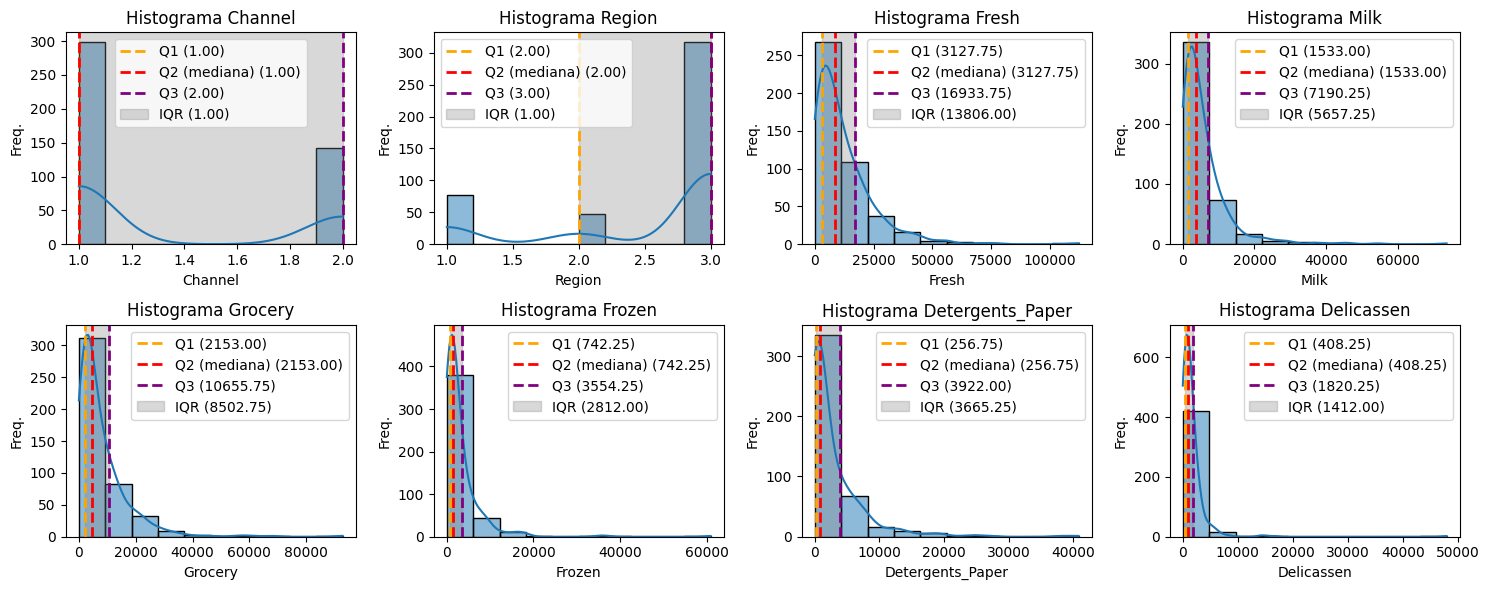

In [7]:
graficar_histogramas(df, columnas_numericas, nro_columnas=4, bins=10, kde=True, figsize=(15, 6))

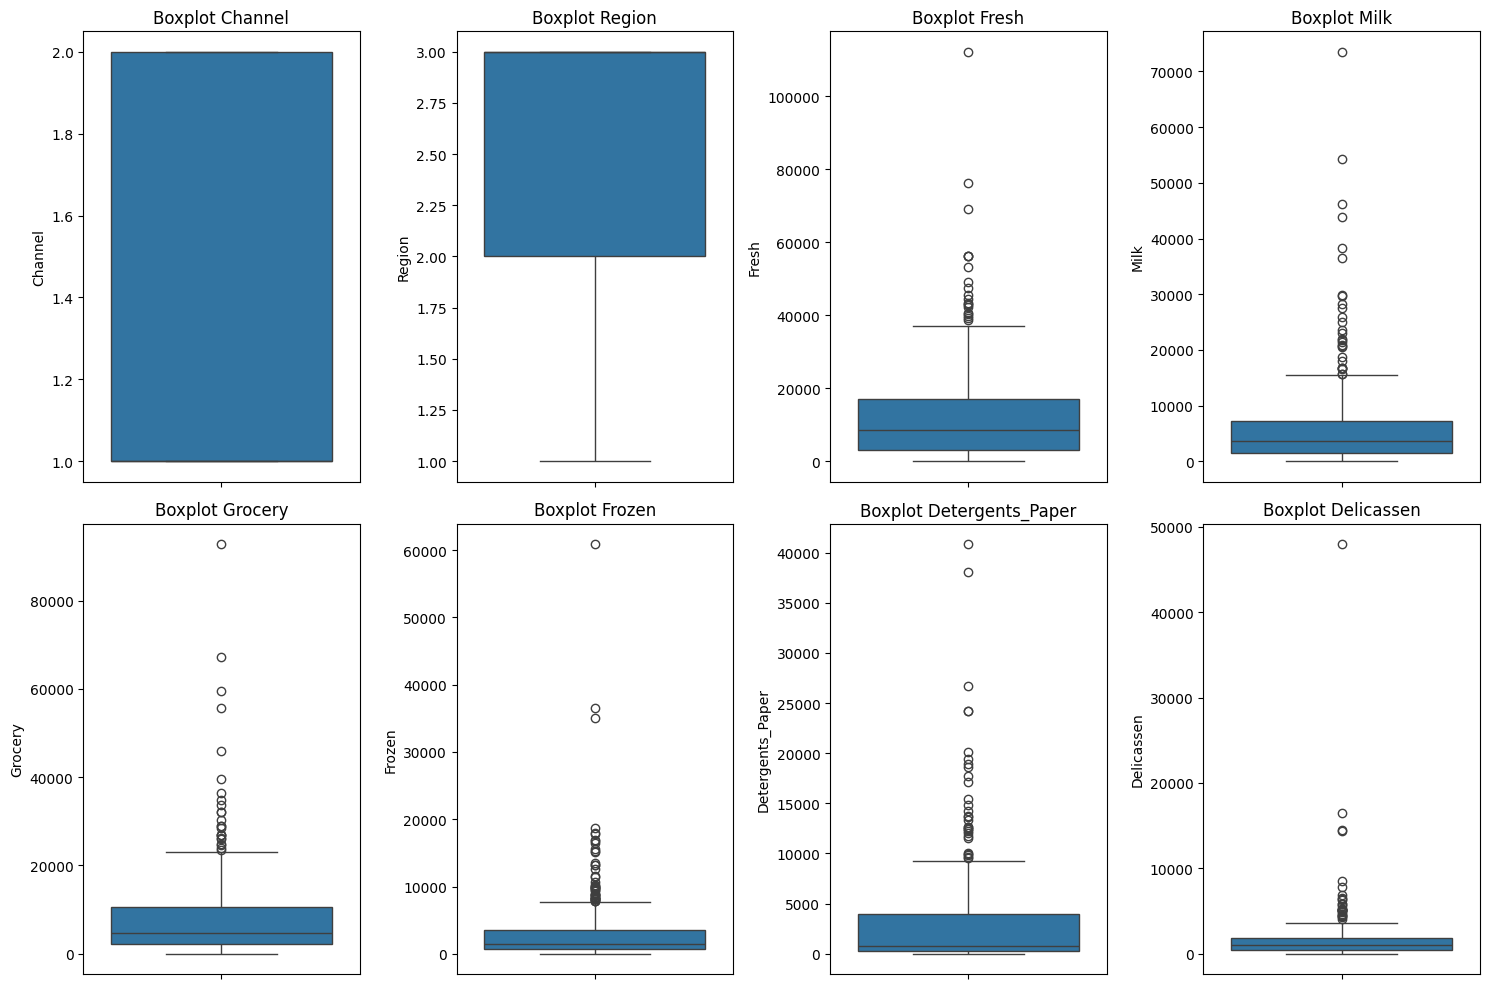

In [8]:
graficar_boxplots(df, columnas_numericas, nro_columnas=4, figsize=(15, 10))

In [9]:
df.drop(columns=['Channel','Region'],inplace=True)

### Considera la posibilidad de eliminar o tratar valores atípicos que puedan afectar el rendimiento del algoritmo.

In [10]:
from utils.eda_utils import obtener_datos_outliers_df


obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
Fresh,20.0,4.545455,-17581.250,37642.750
Milk,28.0,6.363636,-6952.875,15676.125
Grocery,24.0,5.454545,-10601.125,23409.875
Frozen,43.0,9.772727,-3475.750,7772.250
Detergents_Paper,30.0,6.818182,-5241.125,9419.875
Delicassen,27.0,6.136364,-1709.750,3938.250


In [11]:
def manejar_outliers(df_objetivo, columnas):
    for columna in columnas:
        Q1 = df_objetivo[columna].quantile(0.25)
        Q3 = df_objetivo[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - IQR * 1.5
        limite_superior = Q3 + IQR * 1.5

        df_objetivo[columna] = df_objetivo[columna].astype("float64")

        for i in df_objetivo.index:
            valor = df_objetivo.loc[i, columna]
            if(valor > limite_superior):
                df_objetivo.loc[i, columna] = limite_superior
            elif(valor < limite_inferior):
                df_objetivo.loc[i, columna] = limite_inferior


# manejar_outliers(df, df.columns.tolist())

Reconvertimos a entero las columnas que lo pudieran ser, ya que con el calculo previo se pierden los tipos entero por el manejo de outliers.

In [12]:
columnas_flotantes = df.select_dtypes(include="float64")

columnas_convertidas_a_entero = []


def _convertir_a_entero(x):
    if not x.is_integer():
        raise ValueError(f"Valor {x} no es entero")
    return int(x)


for columna in columnas_flotantes:
    datos_columna = df[columna]

    try:
        datos_columna.apply(_convertir_a_entero)
        print(f"Columna '{columna}' es entera. Se procede a convertirla.")
        df[columna] = df[columna].astype("int64")
        columnas_convertidas_a_entero.append(columna)
    except Exception:
        print(f"Columna '{columna}' no es entera. Se mantiene como está.")


print("\n")
print(f"Columnas convertidas a entero: {str(columnas_convertidas_a_entero)}")



Columnas convertidas a entero: []


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


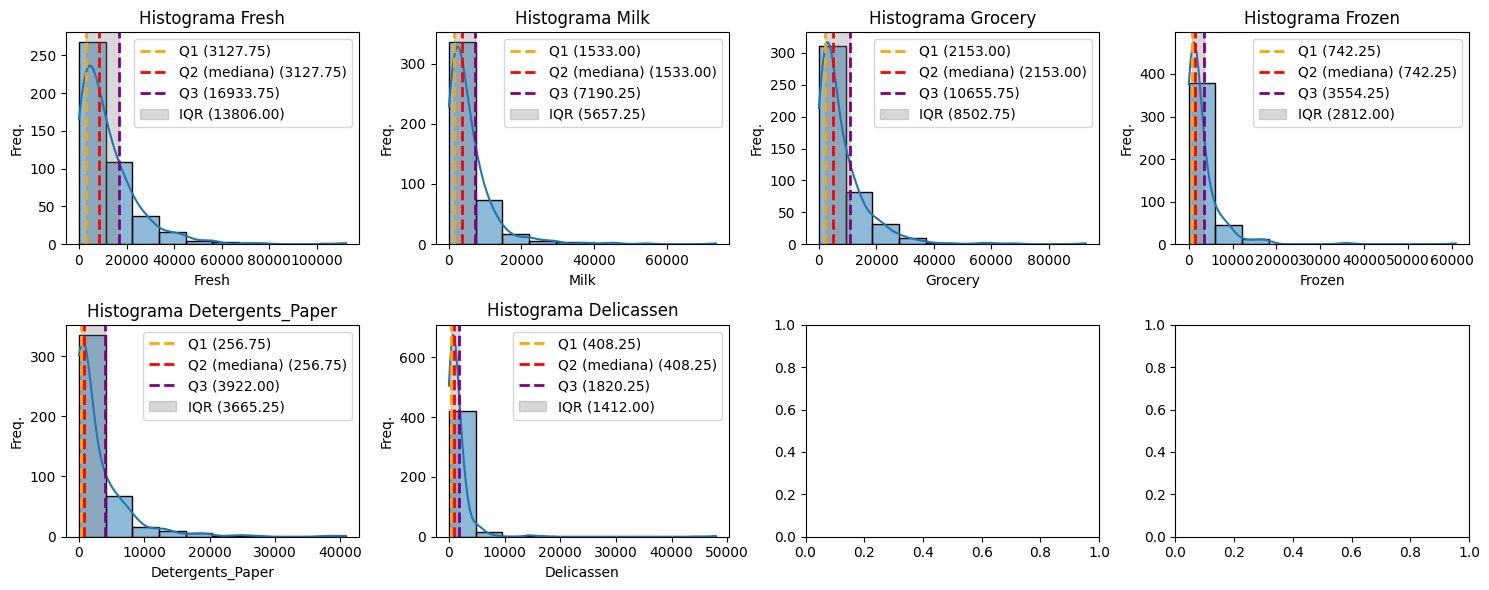

In [14]:
columnas_numericas = obtener_columnas_numericas_df(df)

graficar_histogramas(df, columnas_numericas, nro_columnas=4, bins=10, kde=True, figsize=(15, 6))

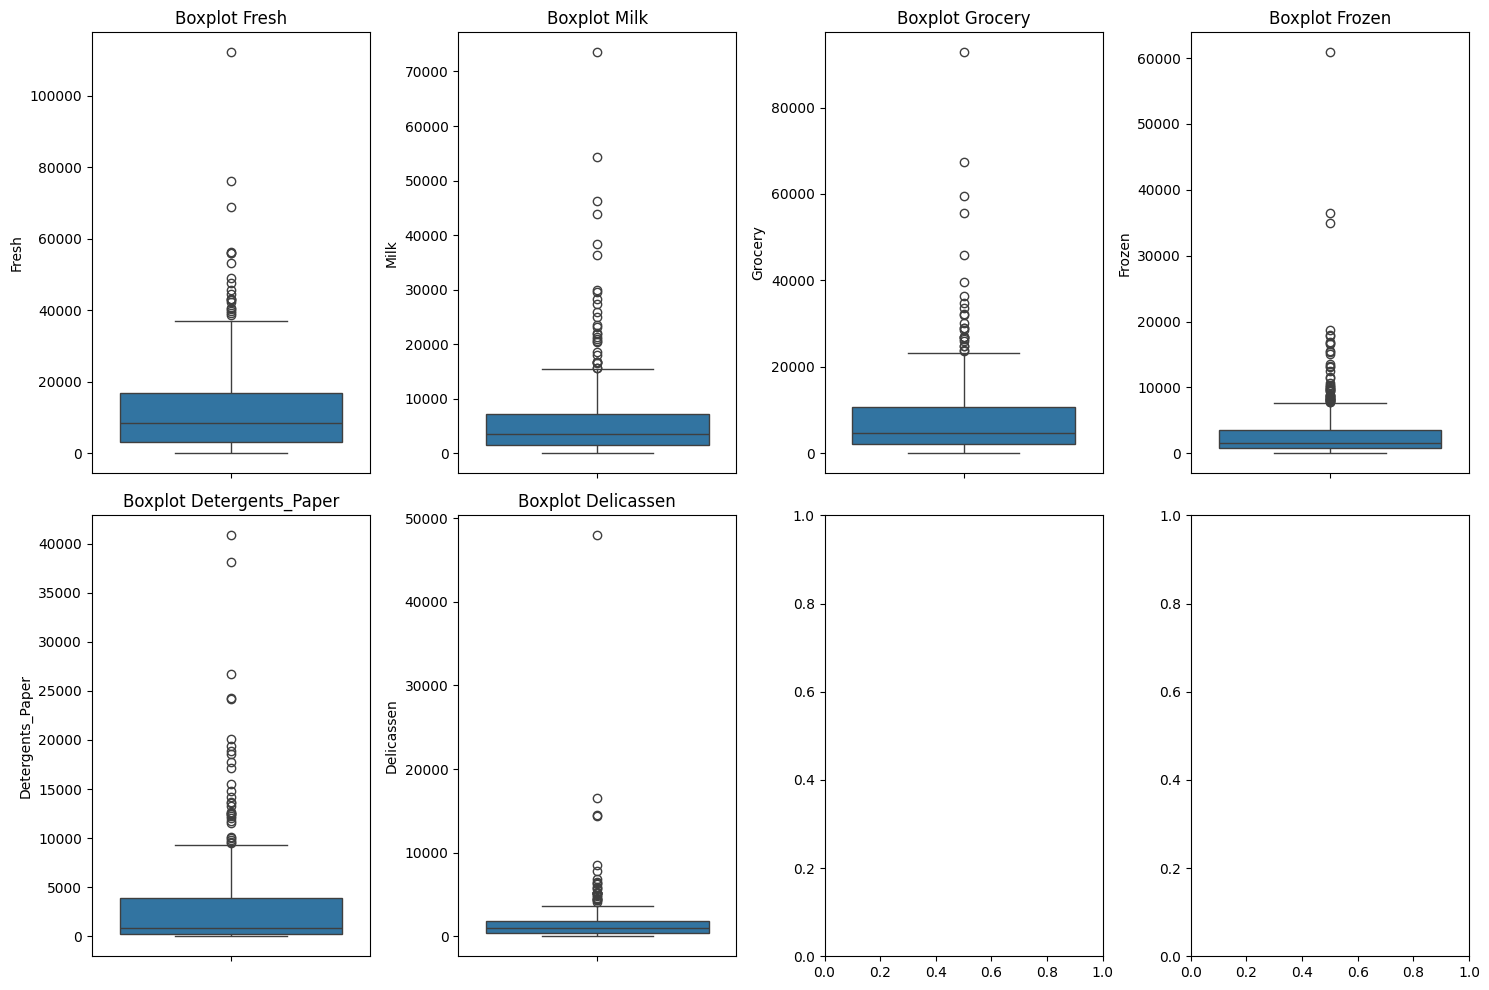

In [15]:
graficar_boxplots(df, columnas_numericas, nro_columnas=4, figsize=(15, 10))

In [16]:
obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
Fresh,440.0,3.0,112151.0,12000.297727,12647.328865,8504.0,1.053918
Milk,440.0,55.0,73498.0,5796.265909,7380.377175,3627.0,1.273299
Grocery,440.0,3.0,92780.0,7951.277273,9503.162829,4755.5,1.195174
Frozen,440.0,25.0,60869.0,3071.931818,4854.673333,1526.0,1.580332
Detergents_Paper,440.0,3.0,40827.0,2881.493182,4767.854448,816.5,1.654647
Delicassen,440.0,3.0,47943.0,1524.870455,2820.105937,965.5,1.849407


                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicassen        0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicassen  
Fresh               0.244690  
Milk                0.406368  
Grocery             0.205497  
Frozen              0.390947  
Detergents_Paper    0.069291  
Delicassen          1.000000  


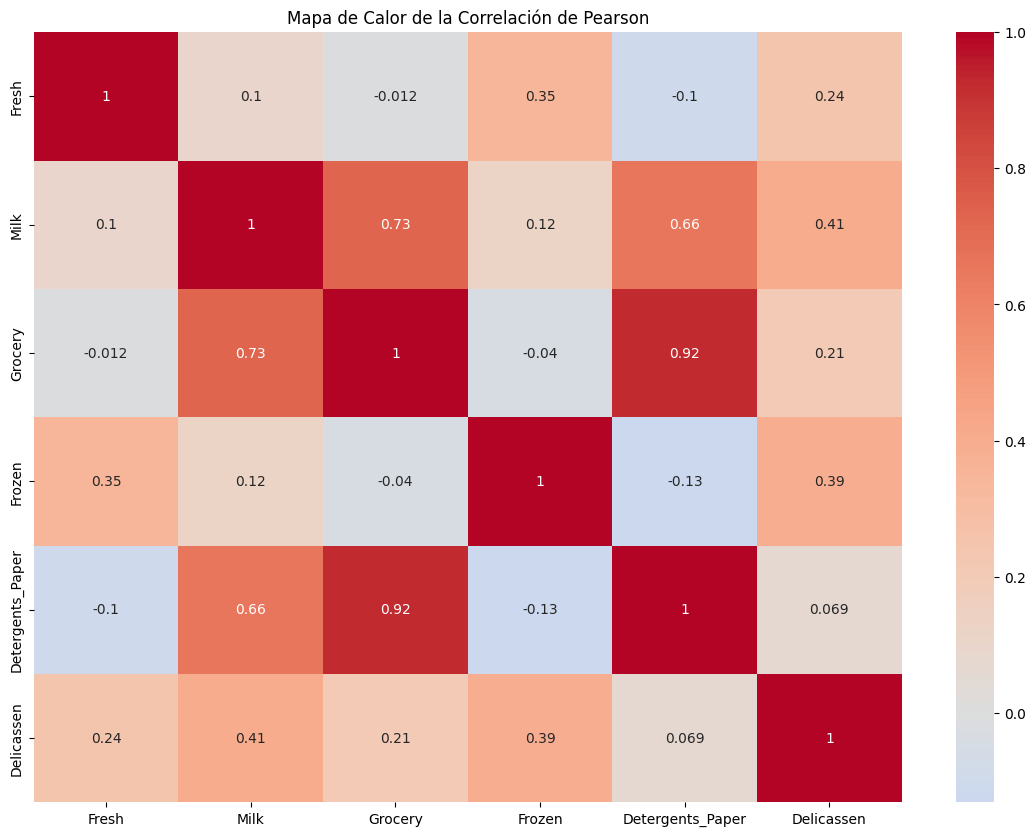

In [17]:
from utils.eda_utils import graficar_mapa_correlacion


graficar_mapa_correlacion(df, columnas_numericas)

### Asegúrate de estandarizar los datos antes de ejecutar DBSCAN, ya que este algoritmo es sensible a la escala de las variables.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(X_scaled, columns=scaler.get_feature_names_out())

In [19]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,-3.431598e-17,1.001138,-0.949683,-0.702334,-0.276760,0.390523,7.927738
Milk,440.0,0.000000e+00,1.001138,-0.778795,-0.578306,-0.294258,0.189092,9.183650
Grocery,440.0,-4.037175e-17,1.001138,-0.837334,-0.610836,-0.336668,0.284911,8.936528
Frozen,440.0,3.633457e-17,1.001138,-0.628343,-0.480431,-0.318804,0.099464,11.919002
Detergents_Paper,440.0,2.422305e-17,1.001138,-0.604416,-0.551135,-0.433600,0.218482,7.967672
Delicassen,440.0,-8.074349e-18,1.001138,-0.540264,-0.396401,-0.198577,0.104860,16.478447


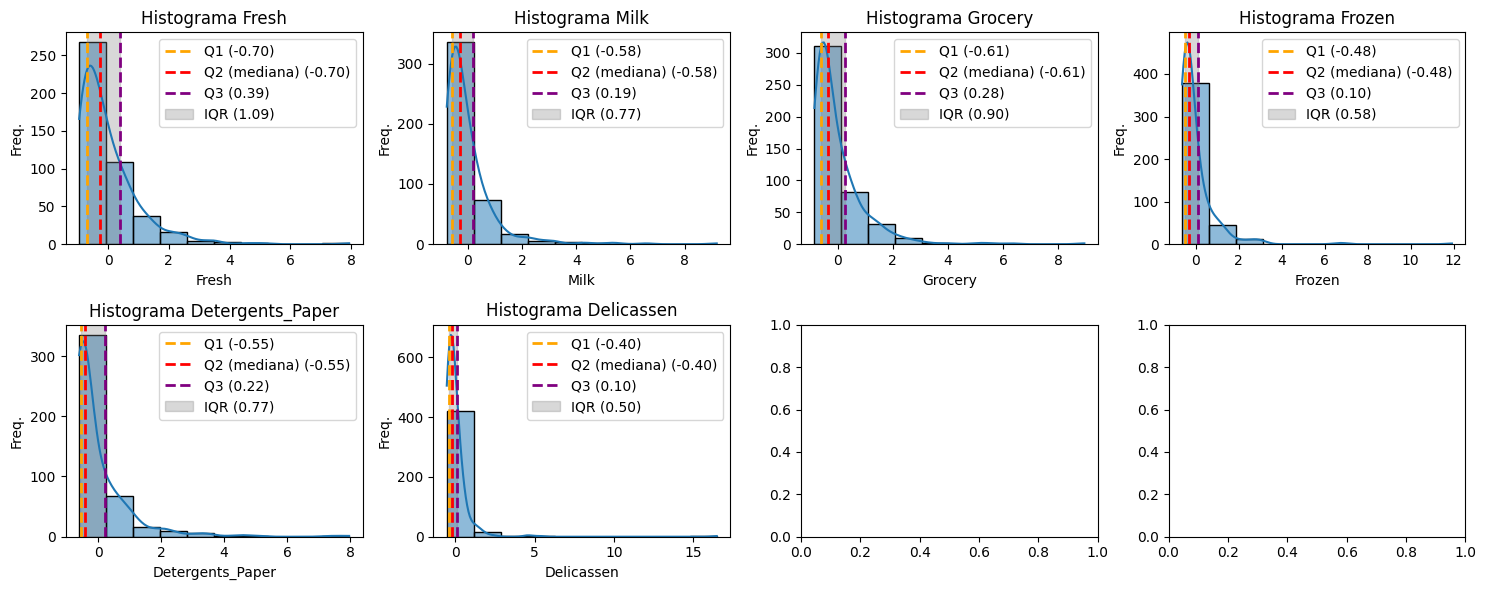

In [20]:
columnas_numericas = obtener_columnas_numericas_df(df_scaled)

graficar_histogramas(df_scaled, columnas_numericas, nro_columnas=4, bins=10, kde=True, figsize=(15, 6))

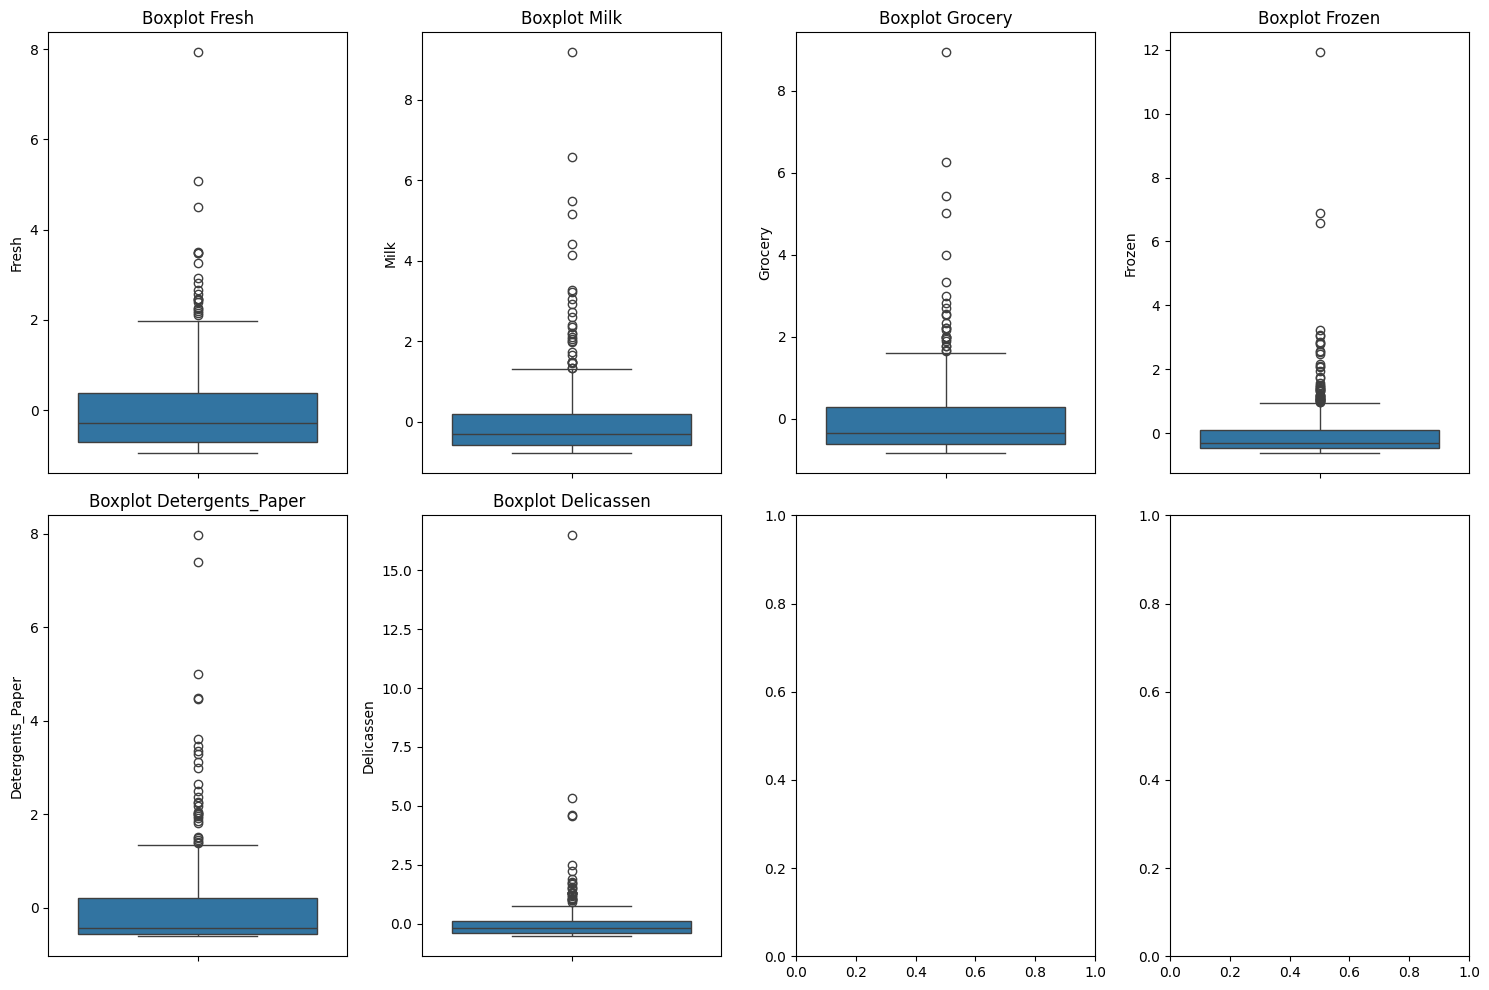

In [21]:
graficar_boxplots(df_scaled, columnas_numericas, nro_columnas=4, figsize=(15, 10))

## 3. Aplicación de DBSCAN:

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors

In [23]:
columnas = df_scaled.columns.tolist()
columnas.remove("Delicassen")

X = df_scaled[columnas].values

### Implementa el algoritmo DBSCAN en el dataset. Recuerda que DBSCAN tiene dos hiperparámetros importantes: epsilon (distancia máxima para considerar dos puntos como vecinos) y min_samples (número mínimo de puntos requeridos para formar un cluster).

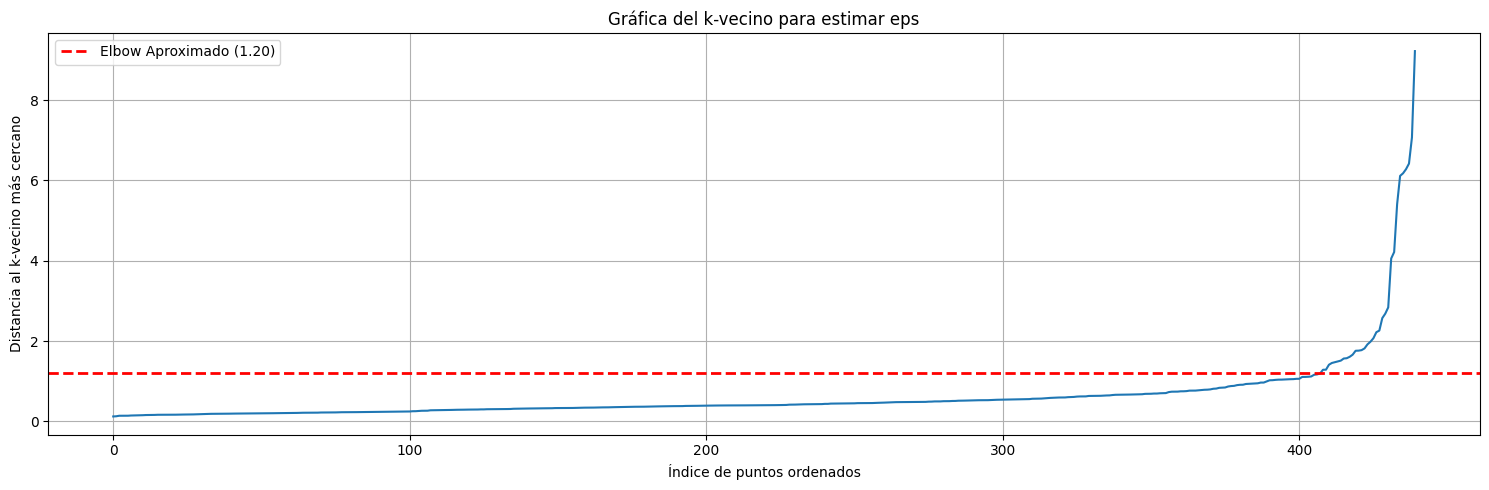

In [24]:
# Configurar min_samples
min_samples = 5

# Ajustar el modelo de k-vecino más cercano
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X)
distances, indices = nbrs.kneighbors(X)

# Ordenar las distancias
distances = np.sort(distances[:, -1])

# Graficar las distancias para estimar eps
plt.figure(figsize=(15, 5))
plt.plot(distances)
plt.title('Gráfica del k-vecino para estimar eps')
plt.xlabel('Índice de puntos ordenados')
plt.ylabel('Distancia al k-vecino más cercano')
elbow = 1.2
plt.axhline(
    elbow,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label=f"Elbow Aproximado ({elbow:.2f})"
)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("../imgs/elbow_k_neighbor_eps.png")
plt.show()

### Experimenta con diferentes valores de epsilon y min_samples para obtener agrupamientos significativos. Utiliza técnicas visuales como gráficos de dispersión para evaluar los resultados obtenidos.

In [25]:
from sklearn.model_selection import ParameterGrid

# Definir un rango de valores para eps y min_samples
param_grid = {
    'eps': np.arange(0.1, 2.0, 0.1),
    'min_samples': range(3, 20, 1)
}

# Crear combinaciones de parámetros
grid = ParameterGrid(param_grid)

# Variable para almacenar los mejores parámetros y resultados
best_params = None
best_score = -1
results = []

# Iterar sobre todas las combinaciones de parámetros
for params in grid:
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    clusters = dbscan.fit_predict(X)
    # Calcular el Silhouette Score solo si hay más de un cluster
    if (len(set(clusters)) > 1 and -1 not in clusters) or (len(set(clusters)) > 2 and -1 in clusters):
        score = silhouette_score(X, clusters)
        results.append((params['eps'], params['min_samples'], score))
        print(f"Score for params {str(params)}: {score}")
        if score > best_score:
            best_score = score
            best_params = params

# Convertir resultados en un array para facilitar gráficos
results = np.array(results)

# Resultados óptimos
print(f"Mejores parámetros: {best_params}")
print(f"Mejor Silhouette Score: {best_score:.4f}")

# Si quieres graficar, aquí tienes las variables:
# - results[:, 0]: eps
# - results[:, 1]: min_samples
# - results[:, 2]: silhouette scores

Score for params {'eps': 0.1, 'min_samples': 3}: -0.3189352313340946
Score for params {'eps': 0.1, 'min_samples': 4}: -0.30078096254545367
Score for params {'eps': 0.2, 'min_samples': 3}: -0.28690333977271315
Score for params {'eps': 0.2, 'min_samples': 4}: -0.24635257790656864
Score for params {'eps': 0.2, 'min_samples': 5}: -0.2589485982116294
Score for params {'eps': 0.2, 'min_samples': 6}: -0.2910686080699152
Score for params {'eps': 0.2, 'min_samples': 7}: -0.29652175386080687
Score for params {'eps': 0.2, 'min_samples': 8}: -0.22887221149806114
Score for params {'eps': 0.2, 'min_samples': 9}: -0.23531785055304325
Score for params {'eps': 0.2, 'min_samples': 10}: -0.2375367600412687
Score for params {'eps': 0.2, 'min_samples': 11}: -0.2553397649770994
Score for params {'eps': 0.30000000000000004, 'min_samples': 3}: -0.27380024288888866
Score for params {'eps': 0.30000000000000004, 'min_samples': 4}: -0.18081379357115218
Score for params {'eps': 0.30000000000000004, 'min_samples': 

In [26]:
dbscan = DBSCAN(eps=1.4, min_samples=3)
dbscan.fit(X)


y_pred = dbscan.fit_predict(X)

score = silhouette_score(X, y_pred)
print(np.unique(dbscan.labels_))
print(score)

y_pred

[-1  0  1]
0.5870448657597562


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [27]:
clusters = np.unique(dbscan.labels_)

### Experimenta con diferentes valores de epsilon y min_samples para obtener agrupamientos significativos. Utiliza técnicas visuales como gráficos de dispersión para evaluar los resultados obtenidos.

/var/folders/fr/wnc6gr_54cgfhzstvy2x471r0000gn/T/ipykernel_3743/3799568486.py:5: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x=X[:,0],y=X[:,col_idx], hue=y_pred, palette=sns.color_palette("Set2"))


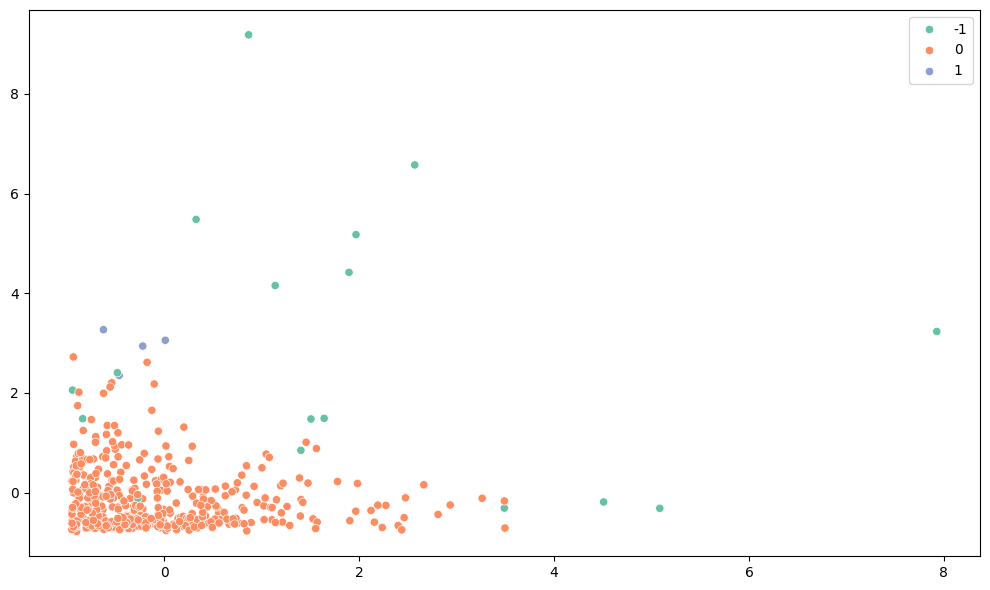

/var/folders/fr/wnc6gr_54cgfhzstvy2x471r0000gn/T/ipykernel_3743/3799568486.py:5: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x=X[:,0],y=X[:,col_idx], hue=y_pred, palette=sns.color_palette("Set2"))


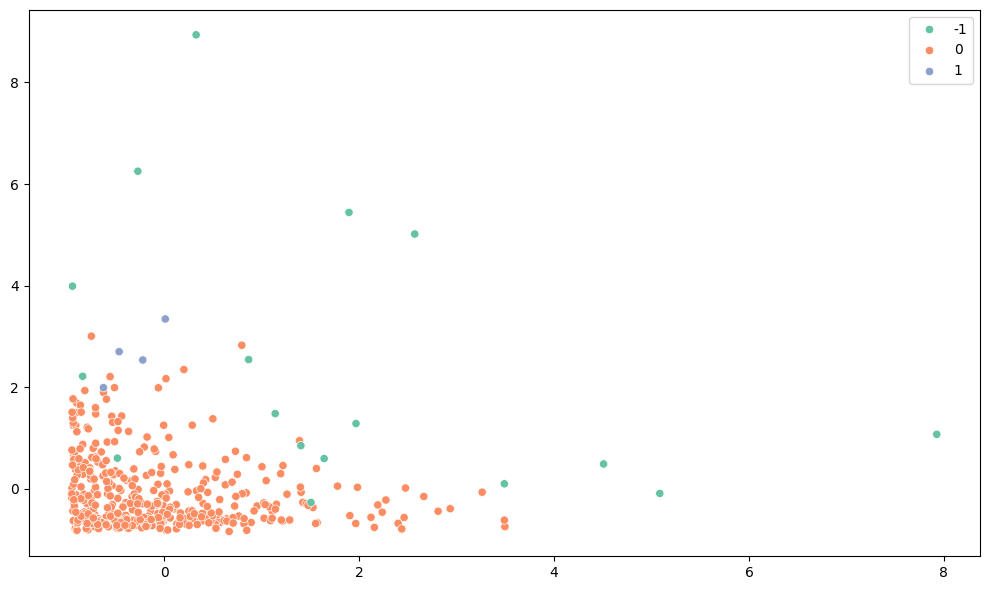

/var/folders/fr/wnc6gr_54cgfhzstvy2x471r0000gn/T/ipykernel_3743/3799568486.py:5: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x=X[:,0],y=X[:,col_idx], hue=y_pred, palette=sns.color_palette("Set2"))


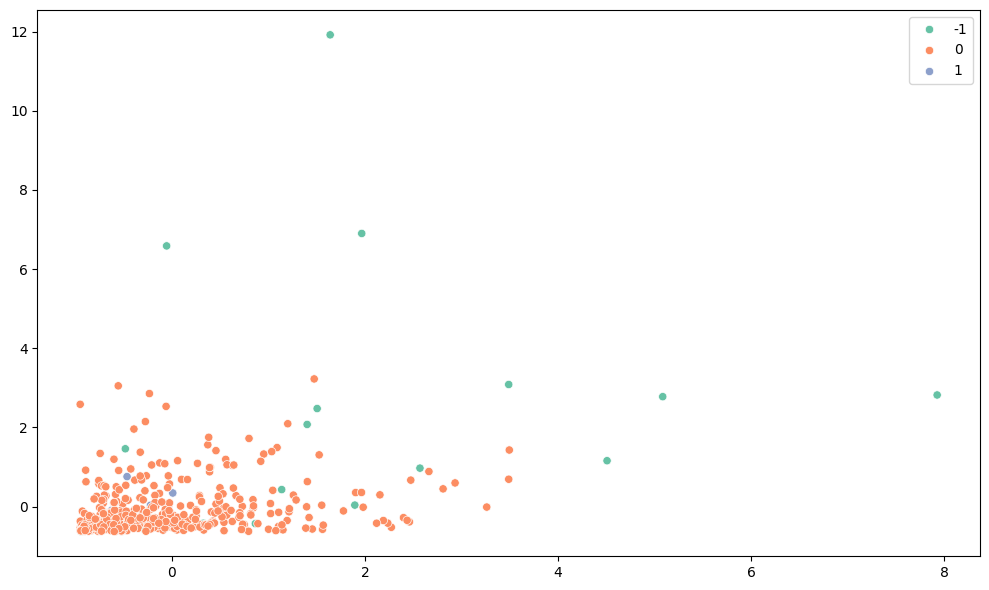

/var/folders/fr/wnc6gr_54cgfhzstvy2x471r0000gn/T/ipykernel_3743/3799568486.py:5: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x=X[:,0],y=X[:,col_idx], hue=y_pred, palette=sns.color_palette("Set2"))


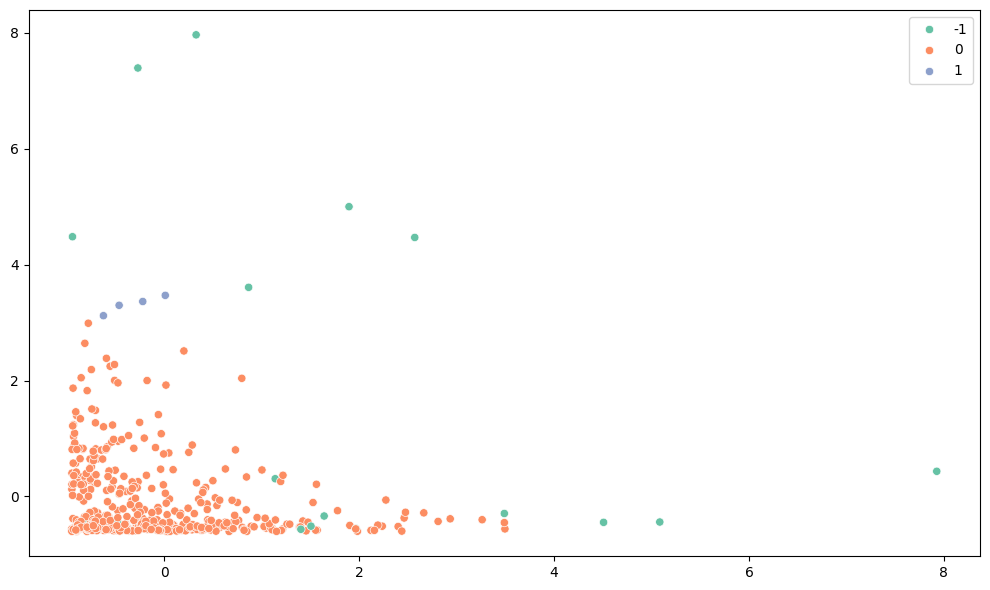

In [28]:
import seaborn as sns

for col_idx in range(1, X.shape[1]):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=X[:,0],y=X[:,col_idx], hue=y_pred, palette=sns.color_palette("Set2"))
    plt.tight_layout()
        
    plt.show()

### Determina cuáles son los outliers identificados por DBSCAN y visualiza cómo se distribuyen en relación con los clusters formados.

Los outlisers son datos muy alejados. Esto podría detectarse en el modelo como ruido ya que están lejos de los datos principales. En el gráfico previo, estos datos estan en el cluster -1.

## 4. Visualización de clusters y outliers:

### Visualiza los clusters formados por DBSCAN en gráficos de dispersión. Utiliza diferentes colores para representar los clusters y marca los outliers con un color distintivo para hacer visible su presencia.

/var/folders/fr/wnc6gr_54cgfhzstvy2x471r0000gn/T/ipykernel_3743/1356104058.py:2: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x=X[:,0],y=X[:,1], hue=y_pred, palette=sns.color_palette("Set2"))


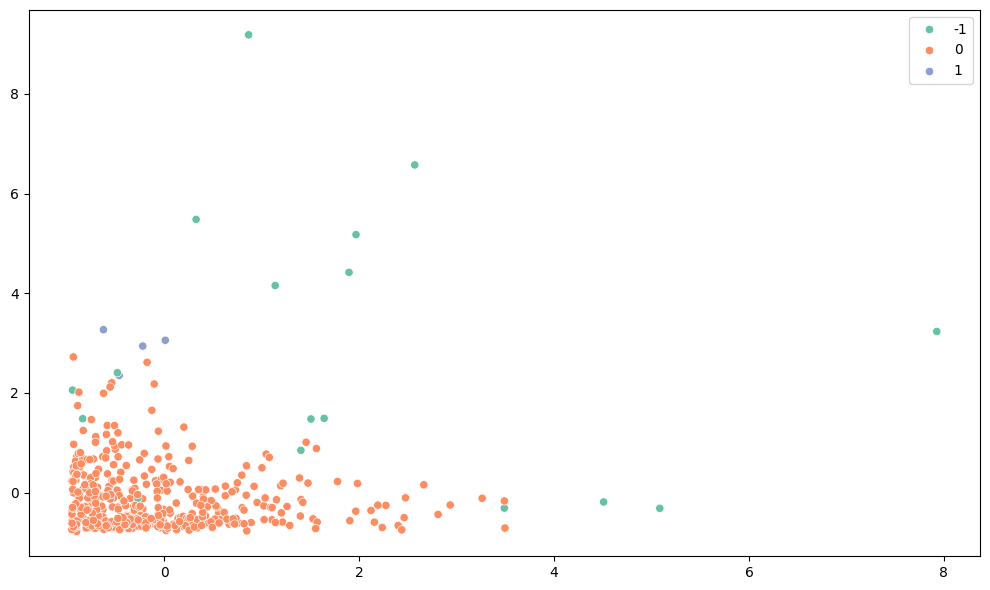

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0],y=X[:,1], hue=y_pred, palette=sns.color_palette("Set2"))
plt.tight_layout()
plt.savefig("../imgs/dbscan_scatterplot.png")
plt.show()

En el gráfico, los outliers podrían potencialmente corresponder al ruido detectado por DBSCAN, y están en el cluster -1.

### Discute la estructura de los clusters encontrados. ¿Hay alguna correlación entre las variables y los clusters? ¿Cómo se distribuyen los outliers en comparación con los datos agrupados?

In [30]:
df_conteo = pd.DataFrame(y_pred, columns=["cluster"])

unicos = df_conteo["cluster"].unique()

for unico in unicos:
    conteo = df_conteo[df_conteo["cluster"] == unico].count()
    print(f"Conteo para cluster {unico}: {conteo}")

Conteo para cluster 0: cluster    418
dtype: int64
Conteo para cluster -1: cluster    18
dtype: int64
Conteo para cluster 1: cluster    4
dtype: int64


Al parecer, no parece haber una correlación muy fuerte. En este caso, la mayoría de los datos se agrupa en un solo grupo (cluster 0) y los elementos correspondientes al cluster 1 son bastante pocos. Los outliers se ven muy alejados de los datos principales, y son pocos en comparación al resto de los datos.

## 5. Interpretación de resultados:

De los datos obtenidos previamente, se puede determinar que DBSCAN no necesariamente es el mejor modelo de clustering para estos datos. Sólamente existe un cluster mayoritario (0) y uno pequeño (1) con el ruido en (-1). Se probaron diversos tipos de combinaciones en eps y min_samples, y a lo máximo que se pudo llegar es a 2 clusters. Esto solo se encontró ya que en la grilla de parámetros para DBSCAN explícitamente solamente se consideraron scores donde existía más de un cluster.

En el caso de los datos de tipo ruido, en los gráficos se pueden ver que generalmente están alejados de los datos principales. Adicionalmente, la cantidad es baja, por lo que no representa un riesgo muy alto para la empresa.

En el caso de los datos en el cluster 1, solamente existen 4 clientes. Debido a que en la búsqueda a través de la grilla solamente se consideraron resultados que den más de un grupo, es probablemente más que nada un caso muy específico resultante de los cálcuols y posiblemente correspondan de igual manera al grupo principal.

Según estos análisis, es probable que DBSCAN no sea el modelo más apropiado para este set de datos, ya que solamente es capaz de crear un clúster principal, siendo los otros clusteres muy pequeños y no representativos.

## Análisis de resultados

* Reporte en Markdown: [reporte.md](../reportes/reporte.md)
* Reporte en PDF: [reporte.pdf](../reportes/reporte.pdf)